# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis

## Data Aquisition

In [2]:
#import pandas library
import pandas as pd

I'll choose 'edible_or_poisonous','cap-shape', 'cap-surface', 'odor' from the mushroom dataset and add the relative column names

In [3]:
header_list = ['edible_or_poisonous','cap-shape', 'cap-surface', 'odor']
# usecols are the 0th, 1th, 2th and 5th according to the Attribute Information
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None, usecols=[0,1,2,5], names = header_list)
df.head()

,edible_or_poisonous,cap-shape,cap-surface,odor
0,p,x,s,p
1,e,x,s,a
2,e,b,s,l
3,p,x,y,p
4,e,x,s,n


## Data Preparation

In [4]:
# convert the edible_or_poisonous value into digit, 'e' is 0, 'p' is 1
df['edible_or_poisonous'].replace(['e','p'], [0,1], inplace=True)
df.head()

,edible_or_poisonous,cap-shape,cap-surface,odor
0,1,x,s,p
1,0,x,s,a
2,0,b,s,l
3,1,x,y,p
4,0,x,s,n


In order to be easily predicted in sklearn, I'll change all categorical features into Dummy numeric data.

In [5]:
df_dummy = pd.get_dummies(df, prefix=['cap-shape', 'cap-surface', 'odor'])
df_dummy.head()

,edible_or_poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


## Exploratory Data Analysis

In [6]:
# check data if includes null value
df.isnull().sum()

edible_or_poisonous    0
cap-shape              0
cap-surface            0
odor                   0
dtype: int64

In [7]:
# check original data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edible_or_poisonous  8124 non-null   int64 
 1   cap-shape            8124 non-null   object
 2   cap-surface          8124 non-null   object
 3   odor                 8124 non-null   object
dtypes: int64(1), object(3)
memory usage: 254.0+ KB


In [8]:
# show data description
df.describe()

,edible_or_poisonous
count,8124.000000
mean,0.482029
std,0.499708
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


There are 8124 rows among these data set. And it showed descriptive stats for edible_or_poisonous variables. The mean is 0.482 which is greater than median value of 0. It means that the values are skewed to the right. So I will check the count of edible and poisonous mushroom data.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

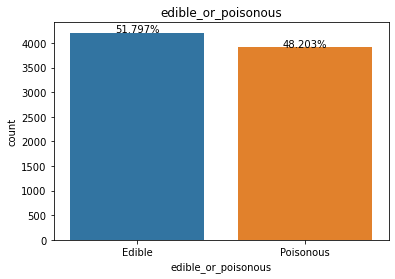

In [11]:
ax = sns.countplot(x="edible_or_poisonous", data=df)
class_dict = {'Edible':0, 'Poisonous':1}
ax.set(xticklabels=class_dict)
plt.title('edible_or_poisonous')
total = len(df['edible_or_poisonous'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

As we can see, the counts of Edible and Poisonous mushroom are quite balanced. This is good for building model.

Next, I will look at the remaining features vs the 'edible_or_poisonous' with diagrams. 

In [18]:
display(df['cap-shape'].value_counts())

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

By displaying the value counts, the shape sample are mainly x:convex and f:flat. I will go to plot the diagram campare to the target.

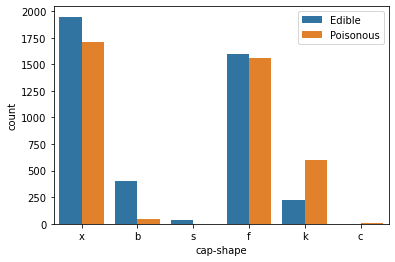

In [22]:
p_shape = sns.countplot(x = 'cap-shape',data = df, hue = "edible_or_poisonous")
p_shape.legend(labels=class_dict)
p_shape

Based on the diagram, "b" and "s" shapes look more likely to be edible.

In [23]:
display(df['cap-surface'].value_counts())

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

By displaying the value counts, the surface sample are mainly y:scaly and s:smooth and f:fibrous. I will go to plot the diagram campare to the target.

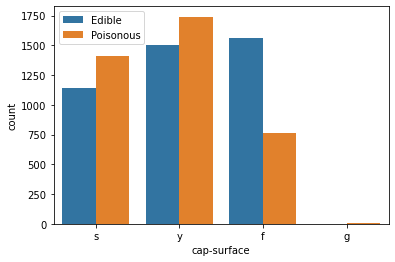

In [24]:
p_surface = sns.countplot(x = 'cap-surface',data = df, hue = "edible_or_poisonous")
p_surface.legend(labels=class_dict)
p_surface

There are few values of g in surface.

In [25]:
display(df['odor'].value_counts())

n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

By displaying the value counts, the odor sample are mainly n:none and f:foul. I will go to plot the diagram campare to the target.

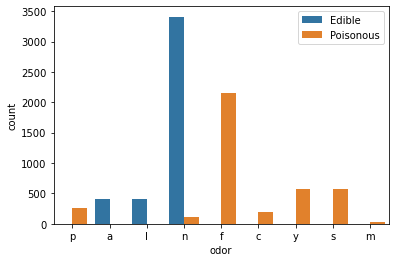

In [27]:
p_odor = sns.countplot(x = 'odor',data = df, hue = "edible_or_poisonous")
p_odor.legend(labels=class_dict)
p_odor

The "ordor" feature may be a better indicator of whether mushrooms are edible or poisonous because the data are clearly unbalanced.

After then, I will see the correlation between all columns in dummy dataset roughly.

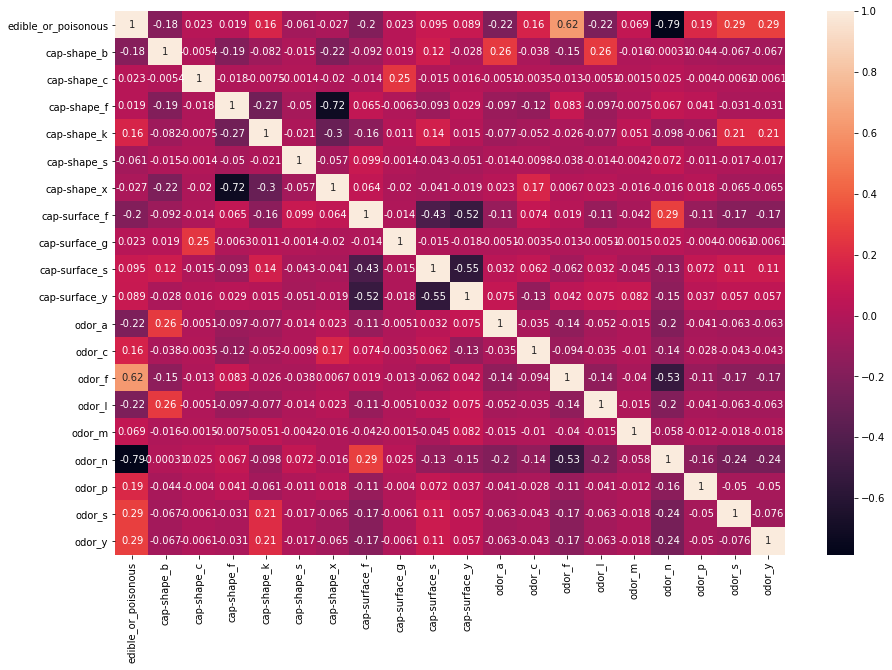

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummy.corr(),annot=True)

According to heatmap, Ordor_f and Ordor_n are likely to be high indicators, as their correlation scores exceed 0.5.
In order to understand the ranking of all indicators related to the target in the virtual data, I will divide and fit the data to obtain the characteristic ranking as shown below.

# Phase II: Build Predictive Models

## Feature determination

### Chi-square testing for selecting categorical feature
I will use chi-squared statistic for feature selection on categorical data. To use chi-square test，we also need to run ordinalcoder to the explantory variable. variable. Then select K best function is to select the k lowest p-values based on chi2 Statistics. Thus p value gave the score of these relevant features.

In [15]:
from sklearn.model_selection import train_test_split

train_data = df_dummy.drop(columns = ["edible_or_poisonous"])
train_target = df_dummy['edible_or_poisonous']

#The data is divided into training set and test set
X_train,X_test,Y_train,Y_test = train_test_split(train_data,train_target,test_size = 0.3,random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5686, 19)
(5686,)
(2438, 19)
(2438,)


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(train_data,train_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['element','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False) # set the order from high to low
featureScores

,element,Score
15,odor_n,2836.187954
12,odor_f,2321.062308
18,odor_y,618.949949
17,odor_s,618.949949
10,odor_a,372.243346
13,odor_l,372.243346
16,odor_p,275.088866
0,cap-shape_b,255.712333
6,cap-surface_f,221.636970
11,odor_c,206.316650


Based on the table, we can see the most important features in the top are odor, which demonstrated the assumption before.

plot the correlation ranking score by featureScores dataframe.

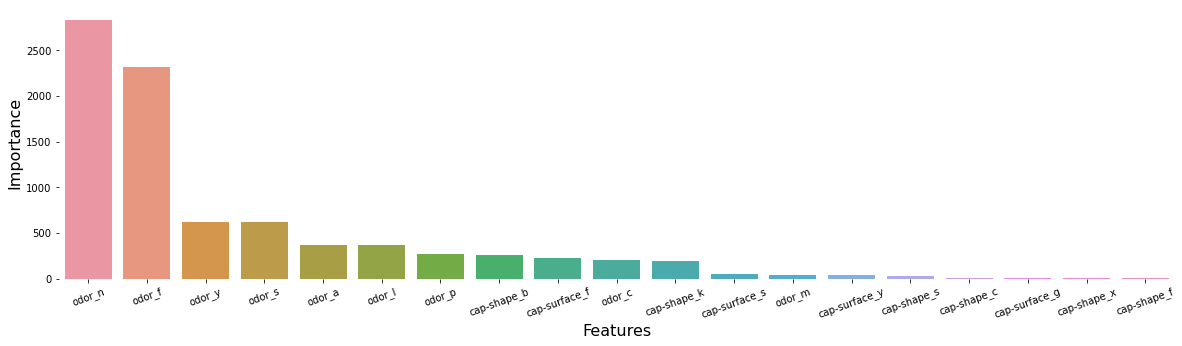

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=20)
sns.barplot(x='element', y='Score', data= featureScores)
plt.box(False)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.show()

Based on the score, I choose the 6 most important features as folllows:
- odor_n
- odor_f
- odor_y
- odor_s
- odor_a
- odor_l

In this section, I will prepare the data by spliting it to training and testing data.
Then I will build a logistic model to predict which features is most helpful to predict whether mushrooms are edible or poisonous, since it is a question of "yes" or "no".

since the target data are balanced, I won't need to use the smote to adjust the data

In [32]:
# check the df_dummy dataset data type and shape
df_dummy.columns.to_list()

['edible_or_poisonous',
 'cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'cap-surface_f',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y']

## predictor detemine

Import the train_test_split function from the Sklearn library and split the target and training data in each feature.

In [33]:
#pick  features for modeling

X = df_dummy[['odor_n','odor_f','odor_y','odor_s','odor_a','odor_l']]
y = df_dummy['edible_or_poisonous']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [36]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (5686, 6)
X_test (2438, 6)
y_train (5686,)
y_test (2438,)


Now we will start the model building. The one reason I list these  varieties of algorithms are based on the requirement of ensembling model. To gurantee the performance of the Ensemble model, I need to let base models to be diverse and independant. Thus can reduce the prediction error. 

In [39]:
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.model_selection import cross_val_score

In [37]:
# Collect all scores and mean accuracy
Scores = []
CV_Scores = []
Accuracy = []
Precision = []
Recall = []
F1_score = []
models = ['logistic regression', 'KNN', 'Random Forest']# 'SVM', 'XG Boost Classifier', 'MLPClassifier', 'VotingClassifier'

Before I start all six models, we would like to mention the general process I did for all models. We either use algorithm or choose manually for hyperparameters. For the training part, we use cross validation to test how well model fits the training data. I use 5 fold crossvalidation for its low bias and modest variance.

### Logistic Regression Model

Building the Logistic regression model to fit training data and predict the test data

In [40]:
from sklearn.linear_model import LogisticRegression

#Start with default setting for logistic regression
Model_LogReg = LogisticRegression()

#train the algorithm
Model_LogReg.fit(X_train, y_train)

#fold validation
cv_score = cross_val_score(estimator = Model_LogReg, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = Model_LogReg.predict(X_test)

print('')
print('###### Logistic Regression ######')
print('Score : %.4f' % Model_LogReg.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(Model_LogReg.score(X_test, y_test))


###### Logistic Regression ######
Score : 0.9836
cv_score : 0.9859
Accuracy: 98.35931091058244
Precision: 98.40937007425651
Recall: 98.35931091058244
F1-score: 98.35771540208336


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### KNN

Since KNN requires the selection of K, as we know, a small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. We choose k=3 asstart point and gradually choose other K values until reached around the square root of sample size n as our models. Since this algorithm is not computing expensive, we can directly use grid search to find the best parameter.

In [42]:
# grid search
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#defining grid
#train sample size is 45032, whose sqrt is 212
n_neighbor = [3,5,16,26,100,212]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.8, random_state=22)

# create and fit  model, testing each parameters
from sklearn.neighbors import KNeighborsClassifier
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=dict(n_neighbors=n_neighbor))
knn_grid.fit(X_train1, y_train1)
print(knn_grid)
# summarize the results of the grid search
print('Best Score: ',knn_grid.best_score_)
print('Best parameters: ',knn_grid.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 16, 26, 100, 212]})
Best Score:  0.9895327635327635
Best parameters:  {'n_neighbors': 3}


In [44]:
#KNN 

from sklearn.model_selection import train_test_split


# Here we will use MinMaxscaler to scale these numerical values.
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

#set k=3
# try knn = KNeighborsClassifier(n_neighbors=5)
# try knn = KNeighborsClassifier(n_neighbors=113)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)
cv_score = cross_val_score(estimator = knn, X = X_train1, y = y_train1, cv = 5,verbose = 1)
y_pred = knn.predict(X_test1)
print('')
print('###### KNN ######')
print('Score : %.4f' % knn.score(X_test1, y_test1))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test1,y_pred))
print('Precision:', 100* precision_score(y_test1,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test1,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test1,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test1,y_pred))
Precision.append(100* precision_score(y_test1,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test1,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test1,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(knn.score(X_test1, y_test1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished



###### KNN ######
Score : 0.9842
cv_score : 0.9895
Accuracy: 98.41538461538461
Precision: 98.46248862248862
Recall: 98.41538461538461
F1-score: 98.41411818108114


### Random forest

In this model, higher number of trees will reduce the variance of model. n_estimators means the number of trees in the forest, and the default 100 n_estimators does perform good in our model. I vary n_estimators based on one of our reference on suggestion. When the number of trees is high, it is also better for model to learn the data, due to the imbalanced nature of the dataset, we set weight to be balanced. Since higher max_depth may raise the risk of overfitting the training data, we set it to be 16 as some literature suggested.

In [45]:
from sklearn.ensemble import RandomForestClassifier
#rnd_clf = RandomForestClassifier(n_estimators=100,  random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=200,class_weight='balanced',  random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=64,class_weight='balanced',  random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced', max_depth=32,  random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced', max_depth=16,  random_state=42)
rnd_clf.fit(X_train, y_train)
cv_score = cross_val_score(estimator = rnd_clf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = rnd_clf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % rnd_clf.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(rnd_clf.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished



###### Random Forest ######
Score : 0.9836
cv_score : 0.9859
Accuracy: 98.35931091058244
Precision: 98.40937007425651
Recall: 98.35931091058244
F1-score: 98.35771540208336


## Model Selection

In [46]:
compare = pd.DataFrame({'Algorithms' : models , 'Scores' : Scores, 'Cross_Val' : CV_Scores, 'Accuracy(%)':Accuracy, 'Precision(%)':Precision, 'Recall(%)':Recall, 'F1-score(%)':F1_score})
compare.sort_values(by='Scores' ,ascending=False)

,Algorithms,Scores,Cross_Val,Accuracy(%),Precision(%),Recall(%),F1-score(%)
1,KNN,0.984154,0.989533,98.415385,98.462489,98.415385,98.414118
0,logistic regression,0.983593,0.985930,98.359311,98.409370,98.359311,98.357715
2,Random Forest,0.983593,0.985930,98.359311,98.409370,98.359311,98.357715


#### Analyze model performance metrics (AUC, ROC, Confusion Matrix)

After building the model, I will test my model by looking at the Confusion Matrix, AUC, and ROC scores

True Positives:1127
False Positives:0
True Negatives:1271
False Negatives:40


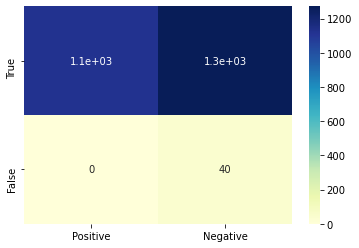

In [48]:
from sklearn.metrics import confusion_matrix

# If the mushroom actually is poisonous and the prediction confirms it, it's called TP
# If the mushroom actually is edible and the prediction confirms it is edible, it is called TN
# If the mushroom actually is edible but the prediction confirms it is poisonous, it is called FP
# If the mushroom actually is poisonous but the prediction confirms it is edible, it's called FN

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Positives:' + str(tp))
print('False Positives:' + str(fp))
print('True Negatives:' + str(tn))
print('False Negatives:'+ str(fn))
matrix = [[tp, tn], [fp, fn]]
df_confusion_matrix = pd.DataFrame(matrix, index=["True", "False"], columns=["Positive", "Negative"])
sns.heatmap(df_confusion_matrix,annot=True,cmap="YlGnBu")

#### Optimize the Confusion Matrix

In [52]:
# accuracy statistics
from sklearn import metrics
from sklearn.metrics import classification_report

In [54]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
# create classification report
class_report=classification_report(y_test, y_pred)
print(class_report)

Accuracy Score: 0.9835931091058244
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1271
           1       1.00      0.97      0.98      1167

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



The feature of 'ordor' is the best indicator since the precision, recall and f1-score are all higher more than 95%, which means the prediction and actual result are almost matched.

In [57]:
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = knn_grid.predict_proba(X_test)[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [58]:
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.986


The ROC and AUC score are pretty high, ehich also demonstrated they are the best indicators.

In [59]:
from sklearn.metrics import roc_curve
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

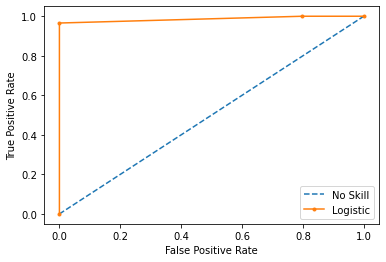

In [60]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

The ploting area is almost in 90 degree, which is close to 100% match to the prediction.

# In conclusion

The "ordor" feature is the best feature for making further predictions about whether mushrooms are poisonous and for building models from the mushroom data set.
As the confusion matrix can directly display the prediction results, and the Logistic, KNN, Random forest models can be tested by precision score, F1-score, AUC and RUC scores, the KNN model is the best prediction model. 
In addition, using the Sklearn library to create dummy datasets can make the training process easier and more accurate.